In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("DataSets/NewProcessed.csv", index_col=0) 

In [3]:
corr_matrix = data.corr()
corr_matrix["minTemp_next"].sort_values(ascending=False)

minTemp_next           1.000000
maxTemp_next           0.944495
Temp20                 0.936637
AvgTemp                0.935584
MaxTemp                0.926435
MinTemp                0.920289
Temp12                 0.914081
Temp6                  0.895482
Months                 0.331146
Humid6                 0.231488
Humid12                0.216861
MaxHumid               0.153695
AvgHumid               0.121190
Year                   0.111452
MinHumid               0.047452
MinPressure            0.023289
Weather Description    0.012442
Day                    0.012098
WeatherDiscpc12       -0.029860
WeatherDiscpc20       -0.034045
Humid20               -0.039765
Press6                -0.042178
WeatherDiscpc6        -0.047353
Press12               -0.069621
AvgPressure           -0.089943
Press20               -0.120269
WinSpeed20            -0.166850
WindDirn6             -0.168476
WindDirn12            -0.174436
WindDirn20            -0.214983
MinSpeed              -0.216108
MaxPress

In [4]:
data = data[["maxTemp_next","minTemp_next" ,"Temp20", "AvgTemp", "MinTemp", "Temp12"
            ,"Temp6", "Months", "Humid6", "Humid12", "WindDirn20", 
            "MaxPressure", "AvgDirn","MaxSpeed", "WinSpeed6","WinSpeed12", "AvgSpeed" ]]

In [5]:
y = data[["minTemp_next"]]

In [6]:
x = data.drop(["minTemp_next"], axis = 1)

In [7]:
val = 200
trainx = x[:data.shape[0]-val].to_numpy()
trainy = y[:data.shape[0]-val].to_numpy().ravel()

In [8]:
testx = x[data.shape[0]-val:]
testy = y[data.shape[0]-val:]

In [9]:
testx.to_csv("minData/testx.csv")
testy.to_csv("minData/testy.csv")
testx = testx.to_numpy()
testy = testy.to_numpy().ravel()

### Linear regression Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
linear_paramn= [
    {"fit_intercept":[True, False],
    'normalize':[True, False],
     'n_jobs': [1,2,3,4,5]
    }
]
grid_linear = GridSearchCV(lin_reg, linear_paramn, cv=10)
grid_linear.fit(trainx, trainy)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'n_jobs': [1, 2, 3, 4, 5],
                          'normalize': [True, False]}])

In [11]:
grid_linear.best_estimator_

LinearRegression(fit_intercept=False, n_jobs=1, normalize=True)

In [12]:
lin_reg = LinearRegression(n_jobs=1, normalize=True)
lin_reg.fit(trainx, trainy)
pred_linearReg = lin_reg.predict(testx)

In [13]:
lin_mse=mean_squared_error(pred_linearReg, testy)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.271786658721774

In [14]:
lin_reg.score(testx, testy)

0.7832591529231097

In [15]:
lin_reg.score(trainx, trainy)

0.93284336695902

In [16]:
lin_reg_scores = cross_val_score(lin_reg,trainx, trainy, scoring="neg_mean_squared_error", cv=10)
lin_reg_scores_rmse = np.sqrt(-lin_reg_scores)

In [17]:
def display_score(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard Devidation:",scores.std())

In [18]:
display_score(lin_reg_scores_rmse)

Scores: [2.41320412 2.08678298 3.19943241 2.43921514 2.34018032 3.00898955
 2.24720641 2.51300489 2.39640048 2.65036249]
Mean: 2.5294778776618685
Standard Devidation: 0.3231905056074899


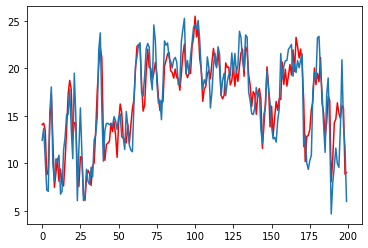

In [19]:
plt.plot(pred_linearReg, "r")
plt.plot(testy)

In [20]:
import joblib
file_name = "minModel.sav"
joblib.dump(lin_reg,)

TypeError: dump() missing 1 required positional argument: 'filename'